# Personalized Movie Recommendations: A Collaborative Filtering Approach

## 1. Business Understanding
### (a) Introduction

CineCollab, established in 2006, has been at the forefront of digital entertainment, captivating audiences worldwide with a rich collection of films and sophisticated recommendation systems. Our success is deeply rooted in our commitment to elevating user experiences through advanced analytics.

This project mirrors CineCollab's dedication, with a focus on refining recommendation systems. We develop complex predictive models, taking into account factors such as individual viewing habits and user behaviors. By mapping these variables, we intend to work closely with CineCollab to boost the precision and effectiveness of its recommendation algorithm.

The MovieLens dataset plays a pivotal role in realizing this objective. Users can rate movies, and our model harnesses these ratings to craft personalized recommendations. The hurdle lies in designing a system that accurately deciphers user ratings and converts them into relevant film suggestions.

The core business problem we tackle is optimizing user engagement by delivering desired movie recommendations. This involves understanding user preferences based on ratings and creating an intuitive and user-friendly platform for users to provide these ratings. We attempt to maintain a balance between simplicity and capturing nuanced user preferences to ensure the recommendations are both accurate and well-received.

In essence, our project seeks to transform the way users rate movies and receive recommendations, aligning with CineCollab's ongoing commitment to personalized content discovery. Through our model, we aim to not only enhance efficiency but also provide a seamless and enriching experience for users globally, delivering top-notch movie recommendations tailored to their unique tastes and preferences.

### (b) Problem Statement

Online streaming platforms are the dominant form of media consumption but viewers often face a paradox of choice when presented with the entire catalogue. Users struggle to navigate through massive catalogues, leading to subscriber frustration and an increased likelihood of churn. By leveraging the MovieLens dataset comprised of over 100,000 ratings applied to nearly 10,000 films by hundreds of users, we intend to push CineCollabs recommendation algorithm forward. Enhancing recommendations based upon movies streamers prefer has the potential to improve CineCollab's user experience and to help audiences discover unexplored content that matches their interests. This project, implemented successfully will  promote media discovery, encourage niche, cult-like viewers and inspire artistry through expanded access to cinema. Building a working, accurate recommendation system will be the key to unlocking the full creative and commercial potential of CineCollab.

### (c) Defining Metrics of Success

The success of a movie recommendation model using collaborative filtering can be assessed using various metrics that measure its effectiveness in providing accurate and relevant movie suggestions. The combination of the metrics provides a comprehensive understanding of its performance in terms of accuracy, relevance, and user satisfaction. It's essential to choose metrics that align with the specific goals and objectives of the recommendation system and the preferences of the user base.

### (d) Research Questions

1. What features contribute most to the accuracy of collaborative filtering in generating top  movie recommendations?

2. How does the frequency of user ratings influence the accuracy and stability of the movie recommendation model?

3. What are the correlation between user ratings and various movie features?

4. Which movie features demonstrate the highest correlation with collaborative filtering recommendations, and how do they impact the model's predictions?

5. How successful is the collaborative filtering model in providing accurate and tailored movie recommendations based on user ratings and preferences?

### (e) The Main Objective

To develop and implement a movie recommendation system that leverages collaborative filtering techniques to provide personalized top 5 movie recommendations for users.

### (f) The Specific Objectives

1. To clean and preprocess the MovieLens datasets to ensure it is suitable for building a recommendation system.

2. To understand the distribution of movie ratings, explore user behavior, and identify patterns in the datasets.

3. To investigate and compare collaborative filtering techniques for building the recommendation system, such as Singular Value Decomposition (SVD), user-based and item-based.

4. To implement and evaluate the performance of the collaborative filtering model using appropriate metrics such as RSME and MSE.

5. To generate top 5 movie recommendations for a user based on their historical ratings.

### (g) Data Understanding

The MovieLens dataset (ml-latest-small) provides a comprehensive snapshot of user preferences and interactions within the MovieLens movie recommendation service. This dataset, created by 610 users over a period spanning from March 29, 1996, to September 24, 2018, is a valuable resource for gaining insights into user behavior, preferences, and movie metadata.
It has 9 attributes.

**Attributes:**

1. **movieId:** Identifier for movies used by MovieLens.
2. **title:** Contains the names of individual movies and serves as a unique identifier for each film within the dataset.
3. **genres:** Classifies films based on overarching themes, narrative structures, and intended emotional impact.
4. **imdbId:** Identifier associated with a movie on the IMDb (Internet Movie Database) platform.
5. **tmdbId:** Identifier associated with movies on TMDb (The Movie Database).
6. **rating:** Numerical evaluation given by users on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
7. **timestamp:** represents seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
8. **tags:** User-generated metadata about movies. Each tag is typically a single word or short phrase, with meaning, value, and purpose determined by each user.
9. **userId:** Unique identifier assigned to each user who participated in movie rating and tagging activities.


**Dataset Statistics:**

100,836 ratings and 3,683 tag applications.
9,742 movies encompassing a diverse array of genres.



In [1]:
#importing relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create data frames 
movies = pd.read_csv("data/ml-latest-small/movies.csv")
links = pd.read_csv("data/ml-latest-small/links.csv")
ratings = pd.read_csv("data/ml-latest-small/ratings.csv")
tags = pd.read_csv("data/ml-latest-small/tags.csv")

In [3]:
#reading the first 3 rows
links.head(3)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


In [4]:
#reading the first 3 rows
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [5]:
#reading the first 3 rows
tags.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


In [6]:
#merge movies and links on 'movieId'
df = pd.merge(movies, links, on='movieId')

#merge with ratings on 'movieId'
df = pd.merge(df, ratings, on='movieId')

#merge with tags on 'movieId'
df = pd.merge(df, tags, on='movieId')

df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,847434962,474,pixar,1137206825


In [7]:
df.shape

(233213, 11)

This signifies that the DataFrame consists of 233,213 rows and 9 columns. Each row corresponds to a unique combination of user-movie interaction, which may include ratings and tags, while the columns represent the attributes of these interactions.

In [8]:
df.info

<bound method DataFrame.info of         movieId                           title  \
0             1                Toy Story (1995)   
1             1                Toy Story (1995)   
2             1                Toy Story (1995)   
3             1                Toy Story (1995)   
4             1                Toy Story (1995)   
...         ...                             ...   
233208   187595  Solo: A Star Wars Story (2018)   
233209   193565       Gintama: The Movie (2010)   
233210   193565       Gintama: The Movie (2010)   
233211   193565       Gintama: The Movie (2010)   
233212   193565       Gintama: The Movie (2010)   

                                             genres   imdbId    tmdbId  \
0       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
1       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
2       Adventure|Animation|Children|Comedy|Fantasy   114709     862.0   
3       Adventure|Animation|Children|Comedy|Fantasy   11470

In [9]:
df.describe()

,movieId,imdbId,tmdbId,userId_x,rating,timestamp_x,userId_y,timestamp_y
count,233213.000000,2.332130e+05,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,2.610632e+05,9378.277742,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,4.414411e+05,36943.139800,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.234900e+04,11.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,1.103570e+05,278.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,1.109120e+05,680.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,1.724950e+05,1892.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,5.580390e+06,503475.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


In [10]:
columns_to_drop = ['timestamp_x', 'timestamp_y']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFram
df.head()

,movieId,title,genres,imdbId,tmdbId,userId_x,rating,userId_y,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,1,4.0,567,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,336,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,5,4.0,474,pixar


In [11]:
col_name = df.columns.tolist()
col_name

['movieId',
 'title',
 'genres',
 'imdbId',
 'tmdbId',
 'userId_x',
 'rating',
 'userId_y',
 'tag']

In [12]:
# Number of movies and users
num_movies = movies['movieId'].nunique()
num_users = ratings['userId'].nunique()

print(f"Number of movies: {num_movies}")
print(f"Number of users: {num_users}")

Number of movies: 9742
Number of users: 610


In [13]:
df.isnull().sum()

movieId     0
title       0
genres      0
imdbId      0
tmdbId      0
userId_x    0
rating      0
userId_y    0
tag         0
dtype: int64

EDA

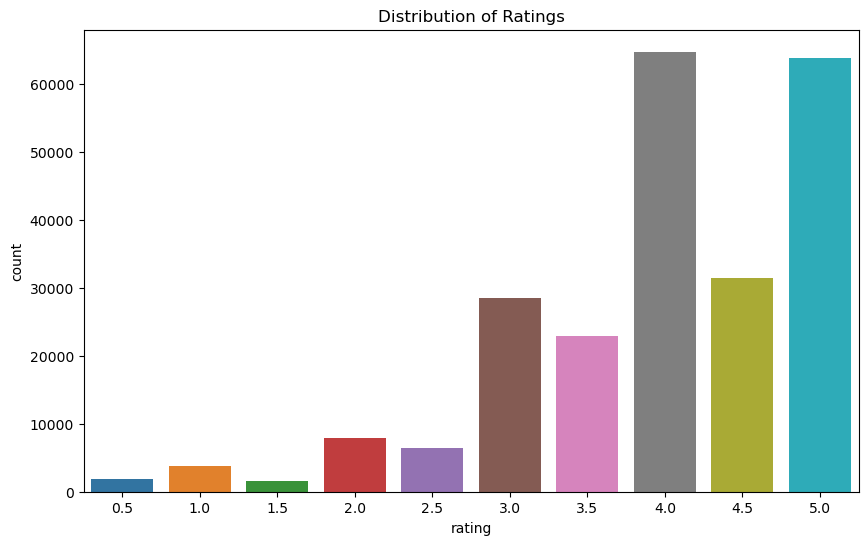

In [14]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.show()

In [15]:
# Most rated movies
most_rated_movies = df.groupby('title')['rating'].count().sort_values(ascending=False)

# Display the top 10 most rated movies
print("Top 10 most rated movies:")
print(most_rated_movies.head(10))

Top 10 most rated movies:
title
Pulp Fiction (1994)                                               55567
Fight Club (1999)                                                 11772
Star Wars: Episode IV - A New Hope (1977)                          6526
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)     4655
2001: A Space Odyssey (1968)                                       4469
Eternal Sunshine of the Spotless Mind (2004)                       4454
Inception (2010)                                                   3718
Big Lebowski, The (1998)                                           3392
Donnie Darko (2001)                                                3161
Forrest Gump (1994)                                                2961
Name: rating, dtype: int64


In [16]:
# Average ratings per user
# Calculate the average rating per user
average_rating_per_user = ratings.groupby('userId')['rating'].mean()

# Display the average rating per user
print("Average rating per user:")
print(average_rating_per_user.head(10))

Average rating per user:
userId
1     4.366379
2     3.948276
3     2.435897
4     3.555556
5     3.636364
6     3.493631
7     3.230263
8     3.574468
9     3.260870
10    3.278571
Name: rating, dtype: float64


In [17]:
# Average rating per movie
avg_rating_per_movie = ratings.groupby('movieId')['rating'].mean()

print("Average rating per movie:")
print(avg_rating_per_movie.head(10))

Average rating per movie:
movieId
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: rating, dtype: float64


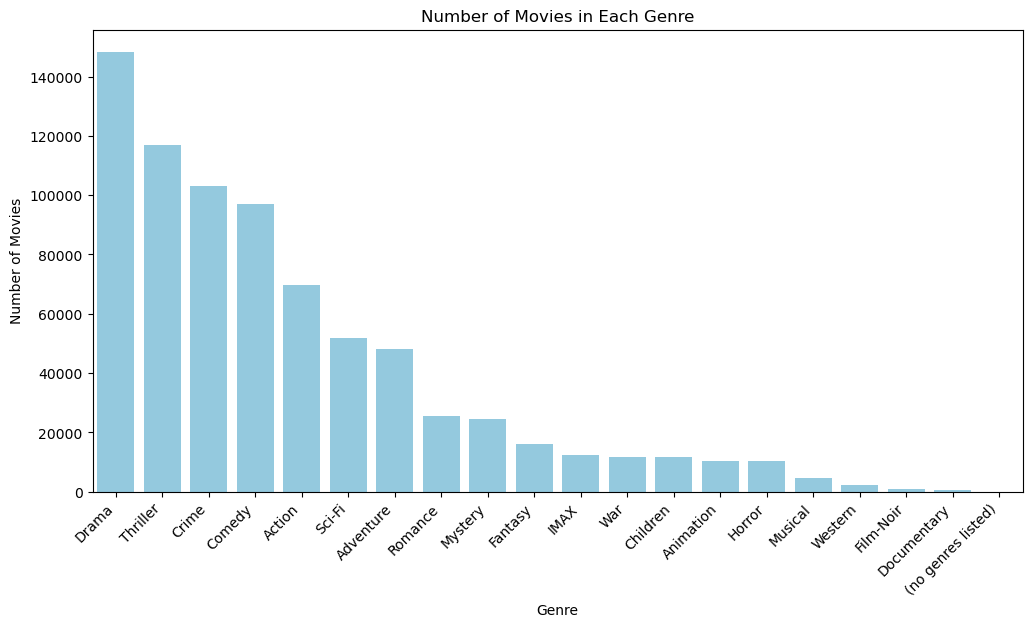

In [18]:
# Split genres and create a count of each genre
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  
plt.show()

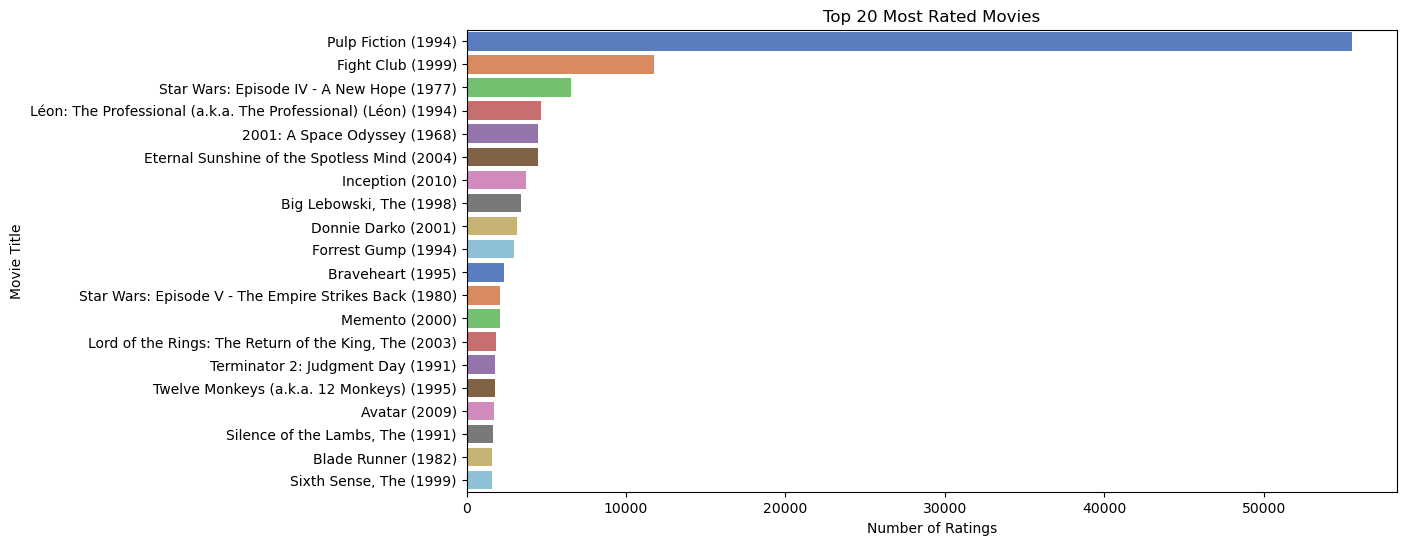

In [19]:
# Calculate the top N most rated movies
top_rated_movies = df.groupby('movieId')['rating'].count().sort_values(ascending=False).head(20)
top_rated_movies = pd.merge(top_rated_movies, df[['movieId', 'title']], on='movieId', how='left')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='title', data=top_rated_movies, palette='muted', orient='h')
plt.title('Top 20 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

In [20]:
# Calculate the correlations
correlations = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(round(correlations, 2), annot=True, linewidths=.7)
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'Toy Story (1995)'

UNIVARIATE DATA ANALYSIS

In [21]:
# to have one userId
def load_and_join_csv(file_path_1, file_path_2, file_path_3):
    # Load CSV files into Pandas DataFrames
    movies = pd.read_csv(file_path_1)
    ratings = pd.read_csv(file_path_2)
    # tags = pd.read_csv(file_path_3)
    
    # Perform inner joins to combine the datasets based on common column movieId
    movies_ratings_df = pd.merge(movies, ratings, on='movieId', how='inner')
      
    return movies_ratings_df

# Replace 'file1.csv', 'file2.csv', 'file3.csv', and 'file4.csv' with your actual file paths
movie_rating_df = load_and_join_csv("data/ml-latest-small/movies.csv", "data/ml-latest-small/ratings.csv", "ml-latest-small/tags.csv")

# Display the resulting dataset
movie_rating_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [22]:
# A function to create plots

def create_plots(df, plot_type, columns_to_plot = None, y = None):
    if plot_type == 'count_plot':
        plt.figure(figsize=(12,8))
        sns.countplot(data=df, x=columns_to_plot)
        plt.title(f'Distribution of movie {columns_to_plot}')
        plt.xticks(rotation=90)
        plt.show()
    elif plot_type == 'bar_plot1':
        plt.figure(figsize=(12, 7))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies')
        plt.xlabel('Movie tile')
        plt.xticks(rotation=90)
        plt.ylabel('Count')
        plt.show()
    elif plot_type == 'bar_plot2':
        plt.figure(figsize=(12, 7))
        sns.barplot(columns_to_plot.index, columns_to_plot.values)
        plt.title('Top 10 most frequently rated movies and their average ratings')
        plt.xlabel('Movie tile')
        plt.xticks(rotation=90)
        plt.ylabel('Average Rating')
        plt.show()

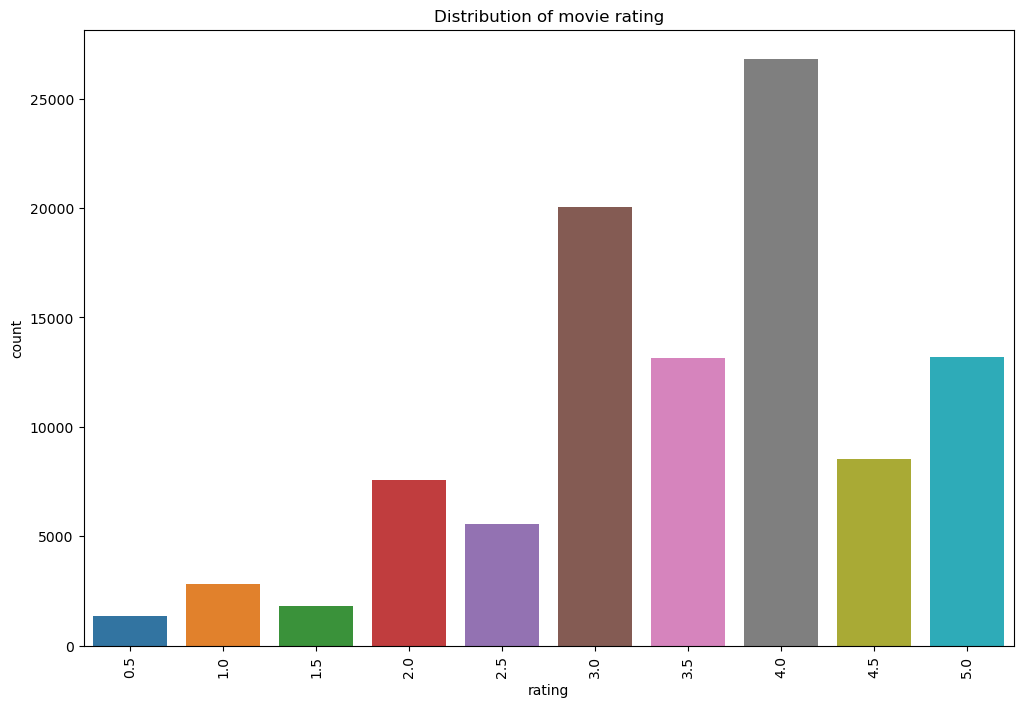

In [23]:
create_plots(movie_rating_df, 'count_plot', 'rating')

In [24]:
# Splitting the genres
def splitting_string(movies):
    movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
    from collections import Counter
    genre_frequency = Counter(g for genres in movies['genres'] for g in genres)
    
    return genre_frequency

splitting_string(movie_rating_df)

Counter({'Drama': 41928,
         'Comedy': 39053,
         'Action': 30635,
         'Thriller': 26452,
         'Adventure': 24161,
         'Romance': 18124,
         'Sci-Fi': 17243,
         'Crime': 16681,
         'Fantasy': 11834,
         'Children': 9208,
         'Mystery': 7674,
         'Horror': 7291,
         'Animation': 6988,
         'War': 4859,
         'IMAX': 4145,
         'Musical': 4138,
         'Western': 1930,
         'Documentary': 1219,
         'Film-Noir': 870,
         '(no genres listed)': 47})

In [25]:
new_df = movie_rating_df.copy()
new_df = new_df.explode('genres')
new_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1,4.0,964982703
0,1,Toy Story (1995),Animation,1,4.0,964982703
0,1,Toy Story (1995),Children,1,4.0,964982703
0,1,Toy Story (1995),Comedy,1,4.0,964982703
0,1,Toy Story (1995),Fantasy,1,4.0,964982703
...,...,...,...,...,...,...
100832,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,1537110021
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,1537110021


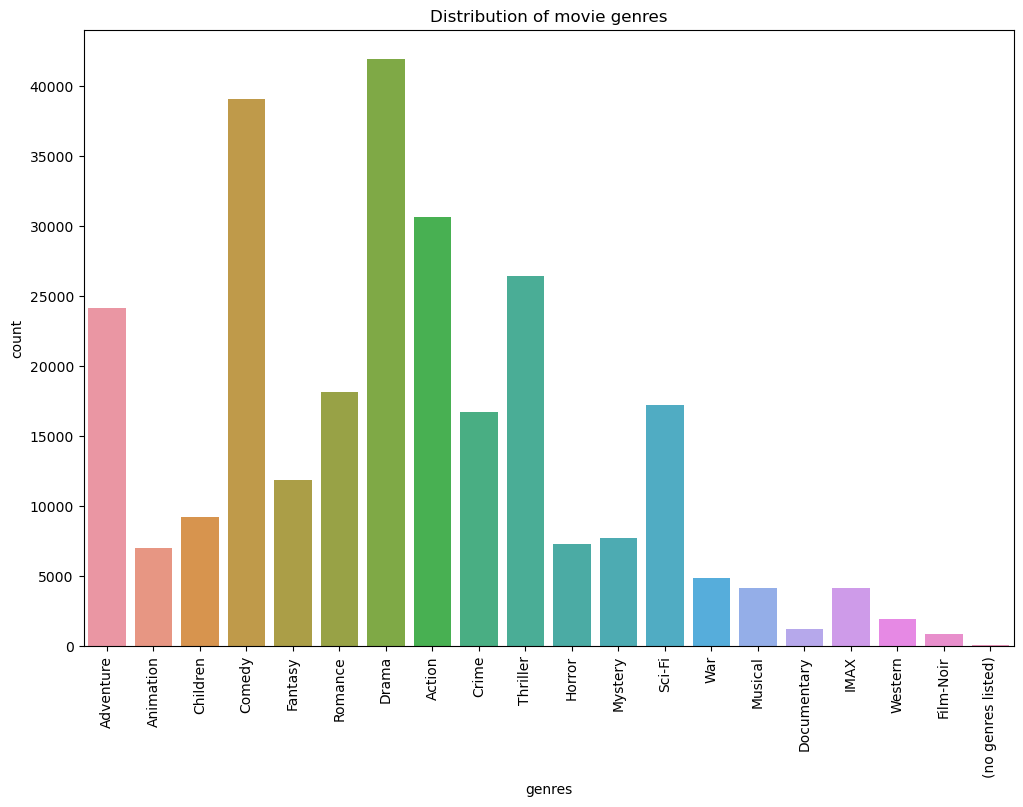

In [26]:
create_plots(new_df, 'count_plot', 'genres')

In [27]:
top_10_views = movie_rating_df['title'].value_counts().nlargest(10)
average_ratings = movie_rating_df.groupby('title')['rating'].mean().loc[top_10_views.index]
create_plots(movie_rating_df, 'bar_plot2', average_ratings)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x700 with 0 Axes>

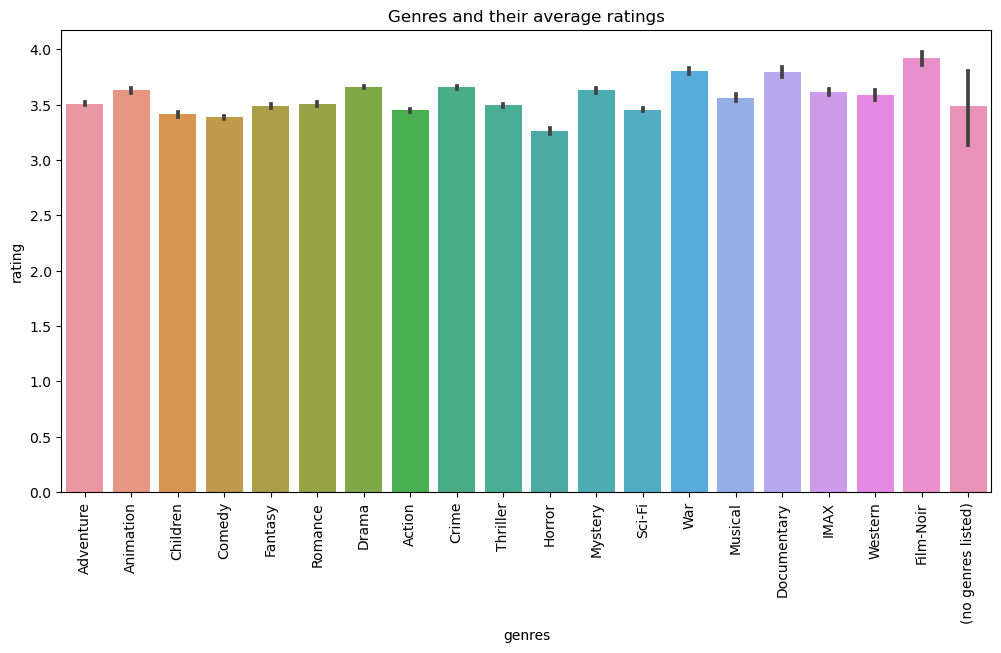

In [28]:
def bar_plot(x, y, data):
    
    plt.figure(figsize=(12,6))
    
    sns.barplot(x=x, y=y, data=data)
    plt.title('Genres and their average ratings')
    plt.xlabel(f'{x}')
    plt.xticks(rotation=90)
    plt.ylabel(f'{y}')
    plt.show()

bar_plot('genres', 'rating', new_df)

AttributeError: 'numpy.float64' object has no attribute 'startswith'

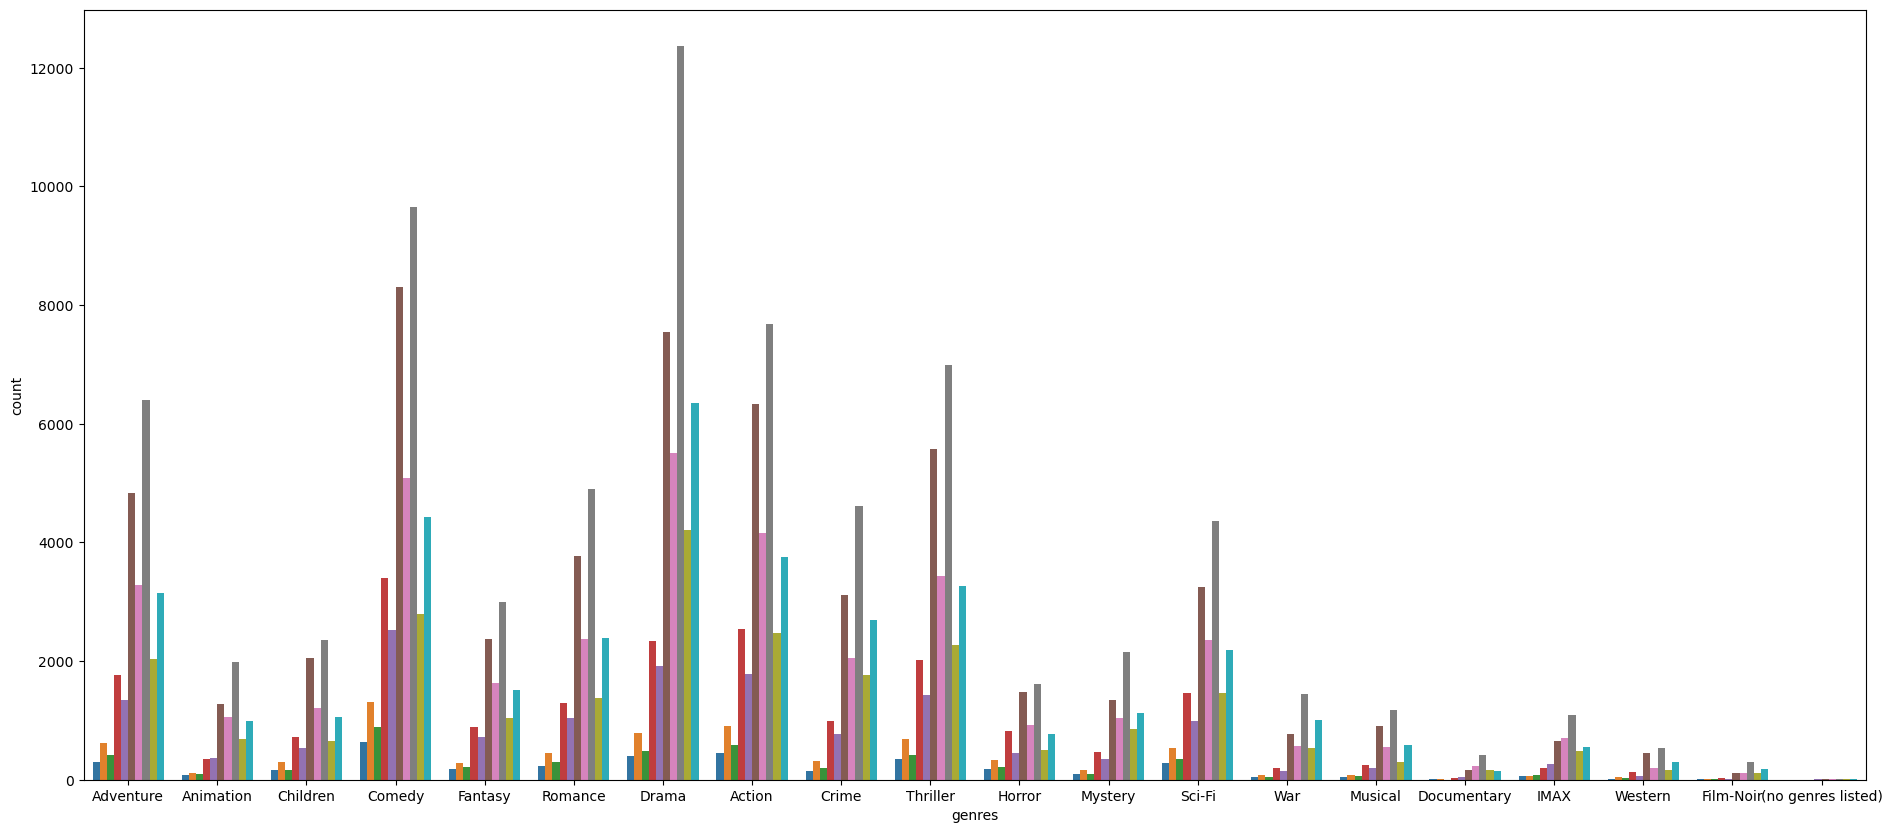

In [29]:
plt.figure(figsize=(23,10))
sns.countplot(data=new_df, x='genres', hue='rating')
plt.title(f'Distribution of rating per genre')
plt.show()

DATA PROCESSING

In [31]:
movie_rating_df


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",184,3.5,1537109545
100833,193585,Flint (2017),[Drama],184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",184,3.5,1537110021


In [32]:
from sklearn.model_selection import train_test_split

# Select the necessary columns from the dataset
user_item_df = movie_rating_df[['userId', 'movieId', 'rating']]

# Transform the pandas dataframe into Surprise dataset
reader = Reader()
data = Dataset.load_from_df(user_item_df, reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=111)

# Print the number of unique users and items in the dataset
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")


NameError: name 'Reader' is not defined

In [34]:
from surprise import Reader, Dataset
from surprise.prediction_algorithms import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.model_selection import train_test_split as tts
from surprise.dataset import DatasetAutoFolds
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import GridSearchCV


In [35]:
# Select the necessary columns from the dataset 
user_item_df = movie_rating_df[['userId', 'movieId', 'rating']]

# Transform the pandas dataframe into Surprise dataset 
reader = Reader()
data = Dataset.load_from_df(user_item_df, reader)

# Split into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=111)

# Print the number of unique users and items in the dataset
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")

Number of users:  610 

Number of items:  8995 



In [36]:
# Function to create the model
def model_creation(approach, trainset, testset):
    if approach == SVD:
        model = approach(n_factors= 50, reg_all=0.05)
        model.fit(trainset)
        print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))
    else:    
        model = approach(sim_options={'name':'pearson', 'user_based':True})
        model.fit(trainset)
        print(f'{approach.__name__} RMSE:', accuracy.rmse(model.test(testset)))  
